In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [65]:
df = pd.read_csv("C:\Ahmed\Programming\Python\ABDELGHAFOR’S VIRTUAL INTERNSHIPS Machine Learning\Session 4\Data\wine-clustering.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ahmed\AppData\Local\Temp\ipykernel_18784\2521229253.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("C:\Ahmed\Programming\Python\ABDELGHAFOR’S VIRTUAL INTERNSHIPS Machine Learning\Session 4\Data\wine-clustering.csv")


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [66]:
df.columns =df.columns.str.lower().str.replace(" " , "")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   ash_alcanity          178 non-null    float64
 4   magnesium             178 non-null    int64  
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280                 178 non-null    float64
 12  proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [68]:
df.isnull().sum()

alcohol                 0
malic_acid              0
ash                     0
ash_alcanity            0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64

In [69]:
def count_empty_strings(column):
    return (column == ' ').sum()

# Count empty strings in each column
empty_strings_count = df.apply(count_empty_strings)

# Display the results
print( f'Number of empty strings in each column: {empty_strings_count}')


Number of empty strings in each column: alcohol                 0
malic_acid              0
ash                     0
ash_alcanity            0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64


In [75]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

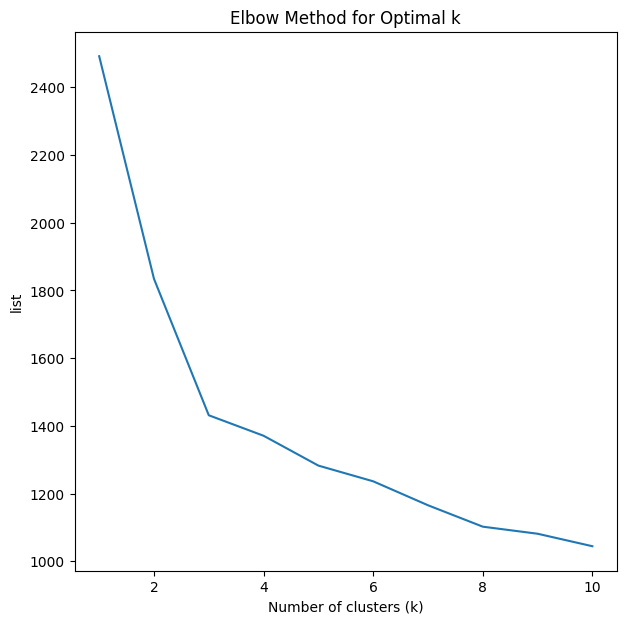

In [78]:
# Elbow method to find the optimal number of clusters
list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    list.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(7, 7))
plt.plot(range(1, 11), list )
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('list')
plt.show()


In [79]:

optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

df['Cluster'] = clusters

In [80]:

cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
Cluster,,,,,,,,,,,,,
0,12.400000,1.539200,2.001600,17.604000,90.840000,2.188000,1.918000,0.330800,1.313200,3.370800,1.117600,2.705200,506.800000
1,13.165000,3.334286,2.412381,21.104762,96.642857,1.707857,0.716667,0.495000,1.169286,7.177143,0.706571,1.758571,653.928571
2,13.751538,1.868462,2.560256,18.043590,107.230769,2.881026,3.022564,0.307692,1.897692,5.649744,1.102051,3.076923,1191.076923
3,12.894000,2.851000,2.529000,22.300000,114.000000,1.573000,1.231000,0.236000,1.132000,6.710000,0.681000,1.497000,553.000000
4,12.163243,2.275135,2.402973,21.913514,90.027027,2.290541,2.252703,0.399189,1.760270,2.841892,1.018378,2.902432,474.027027
5,13.435600,2.071600,2.233200,16.244000,110.840000,2.770400,2.784800,0.248800,2.031200,4.881600,1.013600,3.241200,931.640000


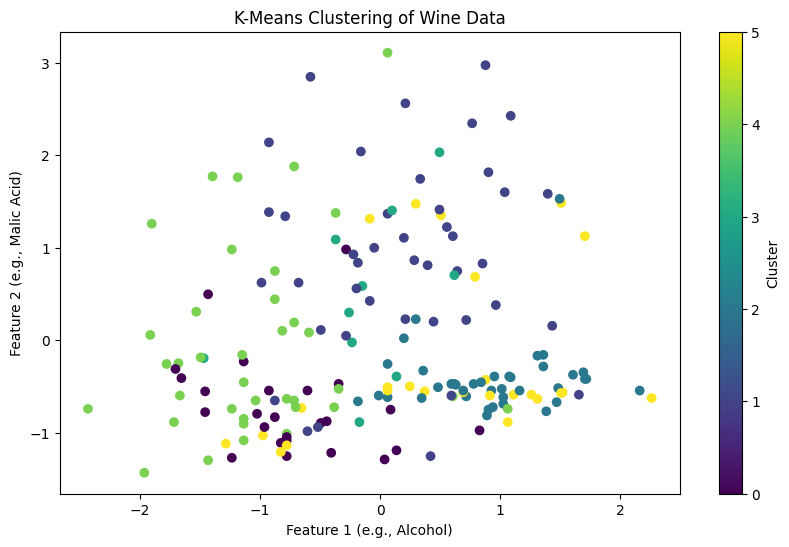

In [81]:

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering of Wine Data')
plt.xlabel('Feature 1 (e.g., Alcohol)')
plt.ylabel('Feature 2 (e.g., Malic Acid)')
plt.colorbar(label='Cluster')
plt.show()